In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import mplcyberpunk

In [32]:
plt.style.use('cyberpunk')
#mplcyberpunk.make_lines_glow()

$$\frac{dx}{dt} = \sin(x)$$

$$x(0) = 0$$

The reparametrization fos this initial value problem is:

$$\hat{x} = x_0 + (1-e^{-(t-t_0)})ANN$$

In [33]:
b2=5

lna_i=0.1
lna_f=5.0

In [34]:
#i) A function to get the derivative of the neural network
def nth_derivative(net, x, n):
    # Initialize the gradient tensor to 1.0, as the 0th derivative is the function itself.
    grad_tensor = torch.ones_like(x, requires_grad=True)

    for _ in range(n):
        # Compute the gradient of the network's output with respect to the input.
        grad_tensor = torch.autograd.grad(net(x), x, grad_outputs=grad_tensor, create_graph=True)[0]

    return grad_tensor

#### Differential equation

In [44]:
#1 Define the fucntion that describes the differential equation F(t;x,x',...)=0
def oscilador(net,t):
    output=net(t)
    return nth_derivative(net, t, 1) + output*(output-1) * (1+2/c*torch.sqrt(output)) + b2*output

In [45]:
#5 el intervalo que queremos para x
puntos=40
t = torch.linspace(lna_i,lna_f,puntos)
t=t.reshape(puntos,1)

#### Architecture 

In [46]:
nodos=40
ANN = nn.Sequential(nn.Linear(1, nodos), nn.Tanh(), nn.Linear(nodos,nodos),
                    # nn.Tanh(), nn.Linear(nodos,nodos),
                    # nn.Tanh(), nn.Linear(nodos,nodos),
                    # nn.Tanh(), nn.Linear(nodos,nodos),
                    # nn.Tanh(), nn.Linear(nodos,nodos),
                    nn.Tanh(),nn.Linear(nodos,1))
print(ANN)

Sequential(
  (0): Linear(in_features=1, out_features=40, bias=True)
  (1): Tanh()
  (2): Linear(in_features=40, out_features=40, bias=True)
  (3): Tanh()
  (4): Linear(in_features=40, out_features=1, bias=True)
)


#### Reparametrization

In [47]:
# Now the re-parametrization of the network, depends on the initial conditions
def ReParam(t,net=ANN):
    #a=(t-ti)*v0
    b=(1-torch.exp(lna_i-t))
    return x0 + b*net(t)

#### Cost function


In [48]:
#Now the cost function
def cost(t):
    t.requires_grad=True
    #calculamos una salida de la red
    return torch.linalg.norm(oscilador(ReParam,t))

In [49]:
#4 Error and optimizer
learning_rate=0.0001
epocas=1000

#optimizer=torch.optim.SGD(ANN.parameters(),lr=learning_rate,momentum=0.9)
optimizer=optimizer = torch.optim.Adam(ANN.parameters(), lr=learning_rate)
#optimizer = torch.optim.Adadelta(ANN.parameters(), lr=learning_rate)

In [51]:
x0=1.10
c=1

In [ ]:
#loop de entrenamiendo 
errores=[]
for i in range(epocas):
    l=cost(t) #coste
    l.backward() #gradiente
    optimizer.step() #se actualizan los parámetros
    optimizer.zero_grad() #vacíamos el gradiente
    #print('época=%.2f , loss=%.2f'%(i,l))
    errores.append(float(l))
print('época=%.2f , loss=%.2f'%(i,l))
plt.plot(range(epocas),errores)


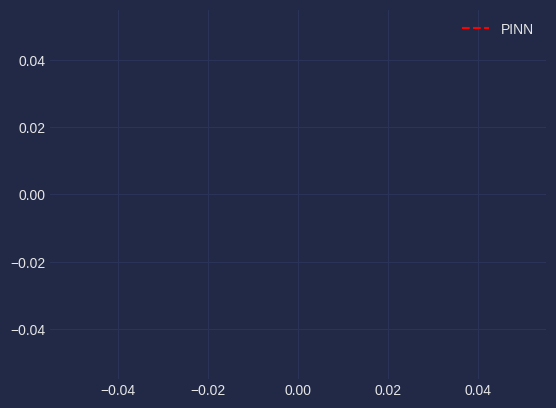

In [29]:
x = torch.linspace(0.1,5.0,100)
x=x.reshape(100,1)

#plt.plot(x,x**2,'ro')
#plt.plot(x,2-torch.cos(x),label='Analitic solution')
plt.plot(x,ReParam(x,net=ANN).detach().numpy(),'--r', label='PINN')
plt.legend()
#mplcyberpunk.make_lines_glow()

In [18]:
nth_derivative(ReParam, x, 1)

tensor([[-0.0024],
        [ 0.0921],
        [ 0.1933],
        [ 0.2946],
        [ 0.3922],
        [ 0.4838],
        [ 0.5689],
        [ 0.6472],
        [ 0.7188],
        [ 0.7836],
        [ 0.8413],
        [ 0.8913],
        [ 0.9329],
        [ 0.9650],
        [ 0.9869],
        [ 0.9979],
        [ 0.9977],
        [ 0.9867],
        [ 0.9656],
        [ 0.9351],
        [ 0.8962],
        [ 0.8490],
        [ 0.7936],
        [ 0.7297],
        [ 0.6574],
        [ 0.5772],
        [ 0.4907],
        [ 0.3995],
        [ 0.3052],
        [ 0.2088],
        [ 0.1107],
        [ 0.0112],
        [-0.0893],
        [-0.1896],
        [-0.2886],
        [-0.3846],
        [-0.4764],
        [-0.5627],
        [-0.6428],
        [-0.7160],
        [-0.7820],
        [-0.8402],
        [-0.8903],
        [-0.9316],
        [-0.9637],
        [-0.9860],
        [-0.9982],
        [-1.0001],
        [-0.9915],
        [-0.9725],
        [-0.9434],
        [-0.9047],
        [-0.